In [126]:
import matplotlib.pyplot as plt
import pandas as pd
import pandasql as ps
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
from datetime import date, time, datetime
import math
import scipy.stats

In [127]:
df1 = pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2012_2015.xlsx', sheet_name='data',encoding = "ISO-8859-1")
df_2016= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2016_2018.xlsx', sheet_name='2016',encoding = "ISO-8859-1")
df_2017= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2016_2018.xlsx', sheet_name='2017',encoding = "ISO-8859-1")
df_2018= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2016_2018.xlsx', sheet_name='2018',encoding = "ISO-8859-1")
df_2019= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2019_2.xlsx', sheet_name='Sheet1',encoding = "ISO-8859-1")
second_bacteremia_class=pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\second_bacteremia_class.xlsx', sheet_name='sheet1',encoding = "ISO-8859-1")
hospital_group=pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\Liat\bacteremiot\hospital_codes.xlsx', sheet_name='Sheet1',encoding = "ISO-8859-1") 
ward_type = pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\CLABSI_2016_2018.xlsx', sheet_name='wards',encoding = "ISO-8859-1")

In [128]:
df_2016.columns = df_2016.columns.str.replace(' ','_')
df_2017.columns = df_2017.columns.str.replace(' ','_')
df_2018.columns = df_2018.columns.str.replace(' ','_')
df_2019.columns = df_2019.columns.str.replace(' ','_')

In [129]:
#df1.sort_values(by="month_year",ascending=False)
#second_bacteremia_class['second_bacteremia_class'].unique()
#df_2019['line_days'].loc[df_2019['Ward']=='ICU'].sum()
df_2019.head()

,hospital,month_year,unit_name,number_of_CLABSI,line_days,number_of_primary_non_CLABSI,number_of_secondary_BSI,_number_of_MBI,total_number_of_events,patient_days,birth_weight,second_bact_1,second_bact_2,second_bact_3,second_bact_4
0,נצרת EMMS,2019-01-01,טיפול נמרץ פנימי וכירורגי,0.0,28.0,0.0,0.0,0.0,0.0,203.0,NaN,NaN,NaN,NaN,NaN
1,נצרת EMMS,2019-01-01,טיפול נמרץ ליילוד ולפג,0.0,0.0,0.0,0.0,0.0,0.0,0.0,< 750 grams,NaN,NaN,NaN,NaN
2,נצרת EMMS,2019-01-01,טיפול נמרץ ליילוד ולפג,0.0,0.0,0.0,0.0,0.0,0.0,0.0,751-1000 grams,NaN,NaN,NaN,NaN
3,נצרת EMMS,2019-01-01,טיפול נמרץ ליילוד ולפג,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1001-1500 grams,NaN,NaN,NaN,NaN
4,נצרת EMMS,2019-01-01,טיפול נמרץ ליילוד ולפג,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1501-2500 grams,NaN,NaN,NaN,NaN


In [130]:
df1['year'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df1['month_year']).year]
df_2016['year'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2016['month_year']).year]
df_2017['year'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2017['month_year']).year]
df_2018['year'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2018['month_year']).year]
df_2019['year'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2019['month_year']).year]
df1['month'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df1['month_year']).month]
df_2016['month'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2016['month_year']).month]
df_2017['month'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2017['month_year']).month]
df_2018['month'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2018['month_year']).month]
df_2019['month'] =  [int(x) if pd.notnull(x) else str('NaN') for x in pd.DatetimeIndex(df_2019['month_year']).month]

In [131]:
df_2016_2019 = pd.concat([df_2016, df_2017, df_2018,df_2019], sort=False)
#df_2016_2019 = df_2016_2019.drop(columns=['Ward'])
print(df_2016.shape)
print(df_2017.shape)
print(df_2018.shape)
print(df_2019.shape)
print(df_2016_2019.shape)

(1464, 26)
(2636, 22)
(2804, 19)
(2793, 17)
(9697, 28)


In [132]:
t=df_2016_2019
#t['patient_days'].loc[(t['Ward']=='ICU') & (t['year']=='2017')].sum()
#t['line_days'].loc[(t['Ward']=='ICU')&(t['year']=='2019')].sum()
df_2016_2019.loc[t['year']==2017,]

,unit_type,unit_name,Ward,number_of_CLABSI,line_days,number_of_primary_non_CLABSI,number_of_secondary_BSI,number_of_MBI,total_number_of_events,patient_days,...,second_bact_3,second_bact_4,second_bact_5,second_bact_6,second_bact_7,second_bact_8,year,month,code,_number_of_MBI
0,טיפול נמרץ פגים,טיפול נמרץ ליילוד ולפג,PAG,NaN,17,0.0,0.0,0.0,0.0,85,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,NaN,NaN
1,טיפול נמרץ פגים,טיפול נמרץ ליילוד ולפג,PAG,NaN,16,0.0,0.0,0.0,0.0,184,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,NaN,NaN
2,טיפול נמרץ פגים,טיפול נמרץ ליילוד ולפג,PAG,NaN,15,0.0,0.0,0.0,0.0,238,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,NaN,NaN
3,טיפול נמרץ פגים,טיפול נמרץ ליילוד ולפג,PAG,NaN,13,0.0,0.0,0.0,0.0,60,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,3,NaN,NaN
4,טיפול נמרץ כירורגי,טיפול נמרץ כירורגי בלבד,ICU,0.0,35,0.0,0.0,0.0,0.0,83,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604,פגיה,טיפול נמרץ ליילוד ולפג,PAG,0.0,52,0.0,0.0,0.0,0.0,185,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,11,NaN,NaN
2605,פגיה,טיפול נמרץ ליילוד ולפג,PAG,1.0,27,0.0,0.0,0.0,1.0,103,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,11,NaN,NaN
2606,פגיה,טיפול נמרץ ליילוד ולפג,PAG,0.0,29,0.0,0.0,0.0,0.0,309,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,11,NaN,NaN
2607,פגיה,טיפול נמרץ ליילוד ולפג,PAG,0.0,18,0.0,0.0,0.0,0.0,517,...,NaN,NaN,NaN,NaN,NaN,NaN,2017,11,NaN,NaN


In [133]:
# Add ward
q_addWard = """select a.*
                      ,b.New as Ward
               from df_2016_2019 a left outer join 
                    ward_type b
               on trim(a.unit_name)=trim(b.unit_type)"""
df_2016_2019_ward = pysqldf(q_addWard)

In [134]:
CHECK =  """ select sum(line_days)
              from df_2016_2019_ward a
              where year=2019
              and Ward="ICU";"""
check_view= pysqldf(CHECK)
check_view

,sum(line_days)
0,63115.0


In [135]:
q_correct_names = """select *,
                           (case when hospital='משפחה קדושה' then 'המשפחה הקדושה' 
                            when hospital='אסף הרופא' then 'יצחק שמיר (אסה"ר)' 
                            when hospital='רמבם' then 'רמב"ם'
                            when hospital='אנגלי נצרת' then 'נצרת אנגלי'
                            when hospital='סנט וינסנט' then 'צרפתי נצרת'
                            when hospital='מרכז רפואי זיו' then 'זיו'
                            when hospital='המרכז הרפואי לגליל' then 'נהריה'
                            when hospital='מרכז רפואי ת"א' then 'איכילוב'
                            when hospital='נצרת  EMMS' then 'נצרת אנגלי' 
                            else hospital end) as hospital2
                     from df_2016_2019_ward a"""

df_2016_2019_hosp = pysqldf(q_correct_names)    

In [136]:
# Add hosp group
q_addGroup1 = """select a.*,
                       b.size
                from df1 a left outer join 
                     hospital_group b 
                on a.hospital2=b.hosp_num;"""
df1_hospGroup = pysqldf(q_addGroup1)

q_addGroup2 = """select a.*,
                       b.size,
                       b.hosp_num
                from df_2016_2019_hosp a left outer join 
                     hospital_group b 
                on trim(a.hospital2)=trim(b.hosp_name);"""
df_2016_2019_hospGroup =pysqldf(q_addGroup2)

In [137]:
col_names=[]
for col in df_2016_2019_hospGroup:
    col_names.append(col)
for name in ['second_bact_1','second_bact_2','second_bact_3','second_bact_4','second_bact_5','second_bact_6','second_bact_7']:
    col_names.remove(name)
col_names    

['unit_type',
 'unit_name',
 'Ward',
 'number_of_CLABSI',
 'line_days',
 'number_of_primary_non_CLABSI',
 'number_of_secondary_BSI',
 'number_of_MBI',
 'total_number_of_events',
 'patient_days',
 'birth_weight',
 'Insertions_number_of_observations',
 'Ongoing_Treatments_number_of_observations',
 'hospital',
 'month_year',
 'comments',
 'second_bact_8',
 'year',
 'month',
 'code',
 '_number_of_MBI',
 'hospital2',
 'size',
 'hosp_num']

In [138]:
for var in ['Ward','size']:
    globals()['table_1'+'_'+var]=pysqldf(
               f"""select year,
               {var},
               sum(CLABSI_number) as CLABSI_sum,
               sum(non_CLABSI_number) as non_CLABSI_number,
               sum(total_bacteremia) as total_bacteremia, 
               sum(line_days) as line_days_sum,
               sum(patient_days) as patient_days_sum, 
               (sum(CLABSI_number)/sum(line_days))*1000 as CLABSI_rate,
               (sum(non_CLABSI_number)/sum(line_days))*1000 as non_CLABSI_rate
        from df1_hospGroup
        where Ward not in ('ICUP','PAG') 
        group by year,{var};"""
                   )
    

In [139]:
df_2016_long=df_2016_2019_hospGroup.melt(id_vars=col_names)
q_join_scnd = """select a.*
                        ,b.second_bacteremia_class
                        ,(case when second_bacteremia_class='זיהום באתר ניתוח' then 1 else 0 end) as SurgerySite
                        ,(case when second_bacteremia_class='זיהום בדרכי השתן' then 1 else 0 end) as UrinaryTract
                        ,(case when second_bacteremia_class='זיהום תוך בטני' then 1 else 0 end) as IntraAbdominal
                        ,(case when second_bacteremia_class='דלקת בדרכי נשימה תחתונות' then 1 else 0 end) as LowerResp
                        ,(case when second_bacteremia_class='זיהום תוך בטני- NEC ילדים' then 1 else 0 end) as NEC
                        ,(case when second_bacteremia_class='אחר' then 1 else 0 end) as Other
                 from df_2016_long a left outer join 
                      second_bacteremia_class b
                 on trim(a.value)=trim(b.second_bacteremia_type);"""
df_2016_long_classified = pysqldf(q_join_scnd)      

q_join_scnd = """ select unit_name
                        ,unit_type
                        ,Ward
                        ,hospital
                        ,hosp_num
                        ,size
                        ,month_year
                        ,year
                        ,month
                        ,max(number_of_CLABSI) as number_of_CLABSI 
                        ,max(number_of_primary_non_CLABSI) as number_of_primary_non_CLABSI 
                        ,max(number_of_secondary_BSI) as number_of_secondary_BSI 
                        ,max(total_number_of_events) as total_number_of_events
                        ,max(total_number_of_events)-max(number_of_CLABSI) as non_CLABSI_number
                        ,max(line_days) as line_days
                        ,max(patient_days) as patient_days
                        ,sum(SurgerySite) as SurgerySite
                        ,sum(UrinaryTract) as UrinaryTract
                        ,sum(IntraAbdominal) as IntraAbdominal
                        ,sum(LowerResp) as LowerResp
                        ,sum(NEC) as NEC
                        ,sum(Other) as Other
                  from df_2016_long_classified
                  where Ward not in ('ICUP','PAG')  
                  group by unit_name,
                           unit_type,
                           Ward,
                           hospital,
                           hosp_num,
                           size,
                           month_year,
                           year,
                           month;"""

df_2016_long_classified_grouped=pysqldf(q_join_scnd)

In [140]:
CHECK_1 =  """ select year,
                      Ward,
                    max(line_days) as line_days
              from df_2016_long_classified a
              group by month_year,year,Ward,hospital,unit_name;"""
              
check_view_1= pysqldf(CHECK_1)


In [141]:
CHECK =  """ select sum(line_days)
              from df_2016_long_classified_grouped a
              where year=2017
              and Ward="ICU";"""
check_view= pysqldf(CHECK)
check_view

,sum(line_days)
0,59721.0


In [142]:
#df_2016_2019_hospGroup.to_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\check.xlsx')


In [143]:
print(df_2016_2019_hospGroup.shape)
print(df_2016_long_classified_grouped.shape)

(9697, 31)
(3237, 22)


In [144]:
for var in ['Ward','size']:
    globals()['table_2'+'_'+var] = pysqldf(
        f"""select year,
        {var},
        sum(number_of_CLABSI) as CLABSI_sum,
        sum(total_number_of_events)-sum(number_of_CLABSI) as non_CLABSI_number,
        sum(line_days) as line_days_sum,
        sum(patient_days) as patient_days_sum,
        sum(number_of_secondary_BSI) as number_of_secondary_BSI_sum,
        sum(total_number_of_events) as total_bacteremia,
        sum(number_of_primary_non_CLABSI) as primary_non_CLABSI_number,
        sum(SurgerySite) as SurgerySite_sum,
        sum(UrinaryTract) as UrinaryTract_sum,
        sum(IntraAbdominal) as IntraAbdominal_sum,
        sum(LowerResp) as LowerResp_sum,
        sum(NEC) as NEC_sum,
        sum(Other) as Other_sum
        from df_2016_long_classified_grouped   
        where Ward not in ('ICUP','PAG') 
        group by year,
                 {var};"""
    )

In [145]:
table_full_Ward = pd.concat([table_1_Ward,table_2_Ward],axis=0)
table_full_Ward = table_full_Ward[["year", "Ward", "CLABSI_sum","non_CLABSI_number","line_days_sum","patient_days_sum","number_of_secondary_BSI_sum",
                        "total_bacteremia","primary_non_CLABSI_number","IntraAbdominal_sum","LowerResp_sum","SurgerySite_sum","UrinaryTract_sum","NEC_sum","Other_sum"]]
table_full_Ward.iloc[0:6,:]

table_full_size = pd.concat([table_1_size,table_2_size],axis=0)
table_full_size = table_full_size[["year", "size", "CLABSI_sum","non_CLABSI_number","line_days_sum","patient_days_sum","number_of_secondary_BSI_sum",
                        "total_bacteremia","primary_non_CLABSI_number","IntraAbdominal_sum","LowerResp_sum","SurgerySite_sum","UrinaryTract_sum","NEC_sum","Other_sum"]]
table_full_size.iloc[0:6,:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,year,size,CLABSI_sum,non_CLABSI_number,line_days_sum,patient_days_sum,number_of_secondary_BSI_sum,total_bacteremia,primary_non_CLABSI_number,IntraAbdominal_sum,LowerResp_sum,SurgerySite_sum,UrinaryTract_sum,NEC_sum,Other_sum
0,2011,NaN,0.0,0.0,NaN,416.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011,1.0,29.0,25.0,4246.0,9155.0,NaN,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011,2.0,6.0,13.0,1225.0,3923.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011,3.0,3.0,15.0,686.0,2163.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,NaN,15.0,32.0,2809.0,4344.0,NaN,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,1.0,181.0,228.0,31127.0,58154.0,NaN,409.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
for var in ['Ward','size']:
    print(var)
    if var == 'Ward':
        table_1='table_full_Ward'
        table_2='table_3_Ward'
    elif var=='size':
        table_1='table_full_size' 
        table_2='table_3_size' 
    globals()['table_3'+'_'+var] = pysqldf(
        f"""select year,
            {var},
            sum(CLABSI_sum) as CLABSI_sum,
            sum(non_CLABSI_number) as non_CLABSI_sum,
            sum(line_days_sum) as line_days_sum,
            sum(patient_days_sum) as patient_days_sum,
            sum(number_of_secondary_BSI_sum) as number_of_secondary_BSI_sum,
            sum(total_bacteremia) as total_sum, 
            sum(primary_non_CLABSI_number) as primary_non_CLABSI_sum,
            sum(SurgerySite_sum) as SurgerySite_sum,
            sum(UrinaryTract_sum) as UrinaryTract_sum,
            sum(IntraAbdominal_sum) as IntraAbdominal_sum,
            sum(LowerResp_sum) as LowerResp_sum,
            sum(NEC_sum) as NEC_sum,
            sum(Other_sum) as Other_sum
            from {table_1}
            group by year,{var};""") 
    
    globals()['table_4'+'_'+var]=pysqldf(
        f"""select *,
        (CLABSI_sum/line_days_sum)*1000 as CLABSI_rate,
        (non_CLABSI_sum/patient_days_sum)*1000 as non_CLABSI_rate,
        (total_sum/patient_days_sum)*1000 as total_rate,
        (number_of_secondary_BSI_sum/patient_days_sum)*1000 as number_of_secondary_BSI_rate,
        (total_sum/patient_days_sum)*1000 as total_number_of_events_rate, 
        (SurgerySite_sum/patient_days_sum)*1000 as SurgerySite_rate,
        (UrinaryTract_sum/patient_days_sum)*1000 as UrinaryTract_rate,
        (IntraAbdominal_sum/patient_days_sum)*1000 as IntraAbdominal_rate,
        (LowerResp_sum/patient_days_sum)*1000 as LowerResp_rate,
        (NEC_sum/patient_days_sum)*1000 as NEC_rate,
        (Other_sum/patient_days_sum)*1000 as Other_rate
        from {table_2};"""
    )                               

Ward
size


In [147]:
q_IRD = """ select *
                   ,CLABSI_rate - lag(CLABSI_rate) over (partition by year,Ward order by year,Ward) as CLABSI_IRD
                   ,non_CLABSI_rate - lag(non_CLABSI_rate) over (partition by year,Ward order by year,Ward) as non_CLABSI_IRD
                   ,total_number_of_events_rate - lag(total_number_of_events_rate) over (partition by year,Ward order by year,Ward) as total_IRD
                   ,lag(CLABSI_sum) over (partition by year,Ward order by year,Ward) as CLABSI_lag
                   ,lag(non_CLABSI_sum) over (partition by year,Ward order by year,Ward) as non_CLABSI_lag
                   ,lag(total_sum) over (partition by year,Ward order by year,Ward) as total_lag
                   ,lag(line_days_sum) over (partition by year,Ward order by year,Ward) as line_days_lag
            from table_4_Ward"""

table_Ward_IRD=pysqldf(q_IRD)

In [148]:
table_4_Ward.sort_values(by=['year','Ward'], ascending=True)
table_4_Ward['CLABSI_IRD'] = table_4_Ward['CLABSI_rate'] - table_4_Ward.sort_values(by=['year'], ascending=True)\
                                                                        .groupby(['Ward'])['CLABSI_rate'].shift(1)
table_4_Ward['non_CLABSI_IRD'] = table_4_Ward['non_CLABSI_rate'] - table_4_Ward.sort_values(by=['year'], ascending=True)\
                                                                       .groupby(['Ward'])['non_CLABSI_rate'].shift(1)
table_4_Ward['total_IRD'] = table_4_Ward['total_number_of_events_rate'] - table_4_Ward.sort_values(by=['year'], ascending=True)\
                                                                       .groupby(['Ward'])['total_number_of_events_rate'].shift(1)
table_4_Ward['CLABSI_lag'] = table_4_Ward.sort_values(by=['year'], ascending=True).groupby(['Ward'])['CLABSI_sum'].shift(1)
table_4_Ward['non_CLABSI_lag'] = table_4_Ward.sort_values(by=['year'], ascending=True).groupby(['Ward'])['non_CLABSI_sum'].shift(1)
table_4_Ward['total_lag'] = table_4_Ward.sort_values(by=['year'], ascending=True).groupby(['Ward'])['total_sum'].shift(1)
table_4_Ward['line_days_lag'] = table_4_Ward.sort_values(by=['year'], ascending=True).groupby(['Ward'])['line_days_sum'].shift(1)

In [149]:
t=table_4_Ward
for name in ['CLABSI','non_CLABSI','total']:
    expected = (t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']/(t['line_days_sum']+t['line_days_lag'])
    std = ((t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']*t['line_days_lag'])/((t['line_days_sum']+t['line_days_lag'])**2) 
    t[name+'_'+'chi'] = (t[name+'_'+'sum']-expected)**2/std
    t[name+'_'+'LL'] = t[name+'_'+'IRD'] - 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_'+'UL'] = t[name+'_'+'IRD'] + 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5

table_4_Ward_IRD = table_4_Ward.drop(columns=['CLABSI_lag','non_CLABSI_lag','total_lag','line_days_lag'])    

In [150]:
t=table_4_Ward_IRD
t['CLABSI_sd'] = [math.sqrt(x)/y for x,y in zip(t['CLABSI_sum'],t['line_days_sum'])]
t['CLABSI_rate_LL'] = [((x/1000)-1.96*y)*1000 for x,y in zip(t['CLABSI_rate'],t['CLABSI_sd'])]
t['CLABSI_rate_UL'] = [((x/1000)+1.96*y)*1000 for x,y in zip(t['CLABSI_rate'],t['CLABSI_sd'])]
t['nonCLABSI_sd'] = [math.sqrt(x)/y for x,y in zip(t['non_CLABSI_sum'],t['patient_days_sum'])]
t['nonCLABSI_rate_LL'] = [((x/1000)-1.96*y)*1000 for x,y in zip(t['non_CLABSI_rate'],t['nonCLABSI_sd'])]
t['nonCLABSI_rate_UL'] = [((x/1000)+1.96*y)*1000 for x,y in zip(t['non_CLABSI_rate'],t['nonCLABSI_sd'])]
t['total_sd'] = [math.sqrt(x)/y for x,y in zip(t['total_sum'],t['patient_days_sum'])] 
t['total_rate_LL'] = [((x/1000)-1.96*y)*1000 for x,y in zip(t['total_rate'],t['total_sd'])]
t['total_rate_UL'] = [((x/1000)+1.96*y)*1000 for x,y in zip(t['total_rate'],t['total_sd'])]
t[['CLABSI_rate','CLABSI_rate_LL','CLABSI_rate_UL','non_CLABSI_rate','nonCLABSI_rate_LL','nonCLABSI_rate_UL']].loc[0:10,]

,CLABSI_rate,CLABSI_rate_LL,CLABSI_rate_UL,non_CLABSI_rate,nonCLABSI_rate_LL,nonCLABSI_rate_UL
0,7.872016,5.100859,10.643174,4.448399,3.069826,5.826972
1,0.000000,0.000000,0.000000,1.589825,0.196282,2.983368
2,3.329634,0.665372,5.993896,3.403014,0.882026,5.924002
3,3.389831,-3.254237,10.033898,0.683527,-0.656186,2.023240
4,7.408980,6.631656,8.186303,5.390836,4.880107,5.901564
5,6.607930,3.555222,9.660637,1.388495,0.999717,1.777274
6,5.362829,4.048936,6.676722,3.932626,2.873858,4.991394
7,8.307373,4.236760,12.377985,2.760085,1.699142,3.821027
8,4.347826,3.809939,4.885713,5.698383,5.206703,6.190064
9,6.048941,3.521250,8.576633,1.250025,0.938869,1.561182


In [151]:
## Secondary rate by type and year ##
q_secondary = """ select year
                         ,sum(line_days) as line_days_sum
                         ,sum(patient_days) as patient_days_sum
                         ,sum(number_of_secondary_BSI) as number_of_secondary_BSI_sum
                         ,sum(SurgerySite) as SurgerySite_sum
                         ,sum(UrinaryTract) as UrinaryTract_sum
                         ,sum(IntraAbdominal) as IntraAbdominal_sum
                         ,sum(LowerResp) as LowerResp_sum
                         ,sum(NEC) as NEC_sum
                         ,sum(Other) as Other_sum
                         ,(sum(number_of_secondary_BSI)/sum(patient_days))*1000 as total_secondary_BSI_rate
                         ,(sum(SurgerySite)/sum(patient_days))*1000 as SurgerySite_rate
                         ,(sum(UrinaryTract)/sum(patient_days))*1000 as UrinaryTract_rate
                         ,(sum(IntraAbdominal)/sum(patient_days))*1000 as IntraAbdominal_rate
                         ,(sum(LowerResp)/sum(patient_days))*1000 as LowerResp_rate
                         ,(sum(NEC)/sum(patient_days))*1000 as NEC_rate
                         ,(sum(Other)/sum(patient_days))*1000 as Other_rate
                  from df_2016_long_classified_grouped   
                  where Ward not in ('ICUP','PAG') 
                  group by year;"""

secondary_by_year = pysqldf(q_secondary) 
secondary_by_year.head()

,year,line_days_sum,patient_days_sum,number_of_secondary_BSI_sum,SurgerySite_sum,UrinaryTract_sum,IntraAbdominal_sum,LowerResp_sum,NEC_sum,Other_sum,total_secondary_BSI_rate,SurgerySite_rate,UrinaryTract_rate,IntraAbdominal_rate,LowerResp_rate,NEC_rate,Other_rate
0,2016,50838.0,115529.0,267.0,35,31,43,124,0,27,2.311108,0.302954,0.268331,0.372201,1.073324,0.0,0.233708
1,2017,83234.0,190813.0,394.0,23,50,53,226,0,36,2.064849,0.120537,0.262037,0.277759,1.184406,0.0,0.188666
2,2018,84471.0,196972.0,388.0,15,33,77,238,0,30,1.969823,0.076153,0.167537,0.390919,1.208294,0.0,0.152306
3,2019,88301.0,206780.0,366.0,23,37,46,235,0,19,1.769997,0.111229,0.178934,0.222459,1.136474,0.0,0.091885
4,NaN,323.0,1128.0,2.0,0,0,0,0,0,0,1.773050,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [152]:
q= """select year,
             count(distinct hospital||ward)
      from df1_hospGroup
      where Ward in ('ICU')
      group by year""";

check = pysqldf(q) 
check

,year,count(distinct hospital||ward)
0,2011,17
1,2012,27
2,2013,26
3,2014,27
4,2015,27
5,2016,23
6,NaN,1


In [153]:
q= """select year,
             count(distinct hospital||ward)
      from df_2016_long_classified_grouped
      where Ward in ('ICU')
      group by year""";

check = pysqldf(q) 
check

,year,count(distinct hospital||ward)
0,2016,28
1,2017,29
2,2018,29
3,2019,29
4,NaN,0


In [154]:
#writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI in ICU 2021\results.xlsx', engine='xlsxwriter')
#table_4_Ward_IRD.to_excel(writer, sheet_name='sheet1')
#table_4_size.to_excel(writer, sheet_name='sheet2')
#secondary_by_year.to_excel(writer, sheet_name='sheet3')
#writer.save()

In [155]:
#writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\processed_tables_18_11.xlsx', engine='xlsxwriter')
#df1_hospGroup.to_excel(writer, sheet_name='2012-2015')
#df_2016_long_classified_grouped.to_excel(writer, sheet_name='2016-2019')
#writer.save()

In [156]:
# Bacteria analysis 
bacteria_2016= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='2016',encoding = "ISO-8859-1")
bacteria_2017= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='2017',encoding = "ISO-8859-1")
bacteria_2018= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='2018',encoding = "ISO-8859-1")
bacteria_2019= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='2019',encoding = "ISO-8859-1")
bacteria_dictionary= pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='groups',encoding = "ISO-8859-1")
bacteria_class = pd.read_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\data\all_bugs_liat.xlsx', sheet_name='group_class',encoding = "ISO-8859-1")

In [157]:
bacteria_2016.columns = bacteria_2016.columns.str.replace(' ','_')
bacteria_2017.columns = bacteria_2017.columns.str.replace(' ','_')
bacteria_2018.columns = bacteria_2018.columns.str.replace(' ','_')
bacteria_2019.columns = bacteria_2019.columns.str.replace(' ','_')

In [158]:
bacteria_2016['year']= [2016]*bacteria_2016.shape[0]
bacteria_2017['year']= [2017]*bacteria_2017.shape[0]
bacteria_2018['year']= [2018]*bacteria_2018.shape[0]
bacteria_2019['year']= [2019]*bacteria_2019.shape[0]

In [159]:
bacteria_2016['primary_total']=bacteria_2016['CLABSI'].fillna(0)+bacteria_2016['primary_MBI'].fillna(0)+bacteria_2016['primary_non-CLABSI'].fillna(0)
bacteria_2018['primary_total']=bacteria_2018['CLABSI'].fillna(0)+bacteria_2018['primary_MBI'].fillna(0)+bacteria_2018['primary_non_CLABSI'].fillna(0)
bacteria_2019['primary_total']=bacteria_2019['CLABSI'].fillna(0)+bacteria_2019['primary_MBI'].fillna(0)+bacteria_2019['primary_non_CLABSI'].fillna(0)

In [160]:
bacteria_2016_sub = bacteria_2016[['year','bacteria','primary_total','secondary_BSI']]
bacteria_2017_sub = bacteria_2017[['year','bacteria','primary_CLABSI','secondary']]
bacteria_2017_sub = bacteria_2017_sub.rename(columns={'primary_CLABSI':'primary_total'})
bacteria_2017_sub = bacteria_2017_sub.rename(columns={'secondary':'secondary_BSI'})
bacteria_2018_sub = bacteria_2018[['year','bacteria','primary_total','secondary_BSI']]
bacteria_2019_sub = bacteria_2019[['year','bacteria','primary_total','secondary_BSI']]

In [161]:
bacteria = pd.concat([bacteria_2016_sub,bacteria_2017_sub,bacteria_2018_sub,bacteria_2019_sub],axis=0)
bacteria.head()

,year,bacteria,primary_total,secondary_BSI
0,2016,Acinetobacter spp,21.0,35.0
1,2016,anaerobic,4.0,4.0
2,2016,Bacillus spp,1.0,NaN
3,2016,Candida spp,25.0,11.0
4,2016,Citrobacter,2.0,NaN


In [162]:
q_merged_names = """ select a.*,
                            b.bacteria_group
                     from bacteria a left outer join
                          bacteria_dictionary b
                     on trim(a.bacteria)=trim(b.bacteria_name);"""
bacteria_merged = pysqldf(q_merged_names)
                          

In [163]:
q_merged_class = """ select a.*,
                            b.bacteria_class
                     from bacteria_merged a left outer join 
                          bacteria_class b
                     on a.bacteria_group=b.bacteria_group;"""
bacteria_merged_class = pysqldf(q_merged_class)

In [164]:
for group in ['bacteria_group','bacteria_class']:
    globals()[group+'_'+'grouped'] = pysqldf(
              f""" select year,
                          {group},
                          sum(primary_total) as primary_total_num,
                          sum(secondary_BSI) as secondary_BSI_num
                   from bacteria_merged_class
                   group by year, 
                            {group};""")

In [165]:
for table in ['bacteria_group_grouped','bacteria_class_grouped']:
    globals()[table+'_'+'pd'] = pysqldf(
              f""" select a.*,
                          b.patient_days_sum
                   from {table} a left outer join
                        (select year,
                                sum(patient_days) as patient_days_sum
                          from df_2016_2019_ward
                          where Ward='ICU'
                          group by year) b
                          on a.year=b.year;""")

In [166]:
bacteria_group_grouped_pd['primary_total_rate'] = (bacteria_group_grouped_pd['primary_total_num']/bacteria_group_grouped_pd['patient_days_sum'])*10000
bacteria_group_grouped_pd['secondary_BSI_rate'] = (bacteria_group_grouped_pd['secondary_BSI_num']/bacteria_group_grouped_pd['patient_days_sum'])*10000

bacteria_class_grouped_pd['primary_total_rate'] = (bacteria_class_grouped_pd['primary_total_num']/bacteria_class_grouped_pd['patient_days_sum'])*10000
bacteria_class_grouped_pd['secondary_BSI_rate'] = (bacteria_class_grouped_pd['secondary_BSI_num']/bacteria_class_grouped_pd['patient_days_sum'])*10000


In [167]:
# bacteria by period #

bacteria_class_grouped_pd['period_ind'] = [1 if (x==2018 or x==2019) else 0 for x in bacteria_class_grouped_pd['year']]
bacteria_class_period_q = """ select period_ind,
                                   bacteria_class,
                                   sum(primary_total_num) as primary_total_num,
                                   sum(secondary_BSI_num) as secondary_BSI_num,
                                   sum(patient_days_sum) as patient_days_sum
                            from bacteria_class_grouped_pd
                            group by period_ind,
                                     bacteria_class;"""

bacteria_class_period = pysqldf(bacteria_class_period_q)

bacteria_class_period['bacteria_class_2'] = [x if pd.notnull(x) else 'other' for x in bacteria_class_period['bacteria_class']]                        

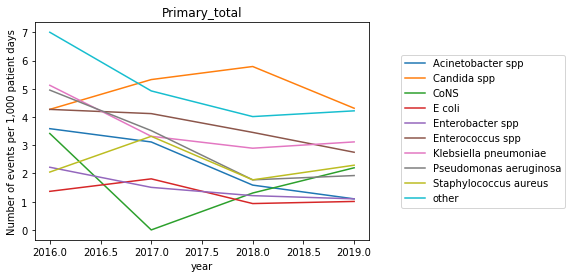

In [168]:
for bacteria in bacteria_group_grouped_pd['bacteria_group'].unique():
    for_graph = bacteria_group_grouped_pd.loc[bacteria_group_grouped_pd['bacteria_group']==bacteria,]
    plt.plot(for_graph['year'],for_graph['primary_total_rate'],label=bacteria)
    plt.xlabel('year')
    plt.ylabel('Number of events per 1,000 patient days') 
    plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
    plt.title('Primary_total')

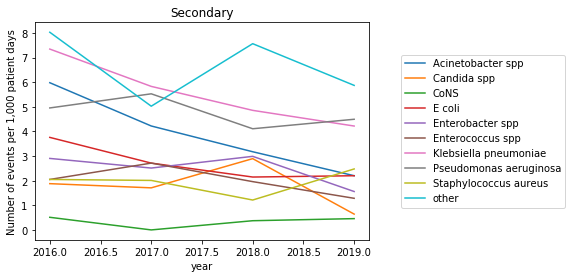

In [169]:
for bacteria in bacteria_group_grouped_pd['bacteria_group'].unique():
    for_graph = bacteria_group_grouped_pd.loc[bacteria_group_grouped_pd['bacteria_group']==bacteria,]
    plt.plot(for_graph['year'],for_graph['secondary_BSI_rate'],label=bacteria)
    plt.xlabel('year')
    plt.ylabel('Number of events per 1,000 patient days') 
    plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
    plt.title('Secondary')

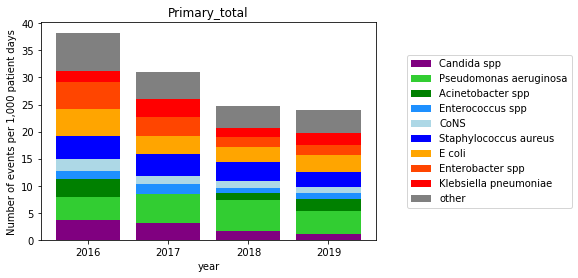

In [170]:
t=bacteria_group_grouped_pd
y1 = t['primary_total_rate'].loc[t['bacteria_group']=='Acinetobacter spp',].values
y2 = t['primary_total_rate'].loc[t['bacteria_group']=='Candida spp',].values
y3 = t['primary_total_rate'].loc[t['bacteria_group']=='CoNS',].values
y4 = t['primary_total_rate'].loc[t['bacteria_group']=='E coli',].values
y5 = t['primary_total_rate'].loc[t['bacteria_group']=='Enterobacter spp',].values
y6 = t['primary_total_rate'].loc[t['bacteria_group']=='Enterococcus spp',].values
y7 = t['primary_total_rate'].loc[t['bacteria_group']=='Klebsiella pneumoniae',].values
y8 = t['primary_total_rate'].loc[t['bacteria_group']=='Pseudomonas aeruginosa',].values
y9 = t['primary_total_rate'].loc[t['bacteria_group']=='Staphylococcus aureus',].values
y10 = t['primary_total_rate'].loc[t['bacteria_group']=='other',].values

x=['2016','2017','2018','2019']


plt.bar(x,y1,color="purple",label='Candida spp')
plt.bar(x,y2,bottom=y1,color="limegreen",label='Pseudomonas aeruginosa')
plt.bar(x,y3,bottom=y1+y2,color="green",label='Acinetobacter spp')
plt.bar(x,y4,bottom=y1+y2+y3,color="dodgerblue",label='Enterococcus spp')
plt.bar(x,y5,bottom=y1+y2+y3+y4,color="lightblue",label='CoNS')
plt.bar(x,y6,bottom=y1+y2+y3+y4+y5,color="blue",label='Staphylococcus aureus')
plt.bar(x,y7,bottom=y1+y2+y3+y4+y5+y6,color="orange",label='E coli')
plt.bar(x,y8,bottom=y1+y2+y3+y4+y5+y6+y7,color="orangered",label='Enterobacter spp')
plt.bar(x,y9,bottom=y1+y2+y3+y4+y5+y6+y7+y8,color="red",label='Klebsiella pneumoniae')
plt.bar(x,y10,bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9,color="gray",label='other')

plt.xlabel('year')
plt.ylabel('Number of events per 1,000 patient days') 
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title('Primary_total')
plt.savefig('bacteria_plot_1.png',pad_inches=0.5)

Text(0.5, 1.0, 'Secondary')

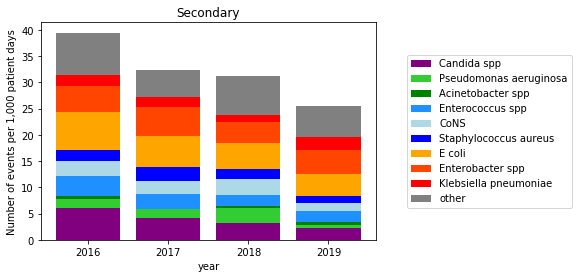

In [171]:
t=bacteria_group_grouped_pd
y1 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Acinetobacter spp',].values
y2 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Candida spp',].values
y3 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='CoNS',].values
y4 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='E coli',].values
y5 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Enterobacter spp',].values
y6 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Enterococcus spp',].values
y7 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Klebsiella pneumoniae',].values
y8 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Pseudomonas aeruginosa',].values
y9 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='Staphylococcus aureus',].values
y10 = t['secondary_BSI_rate'].loc[t['bacteria_group']=='other',].values

x=['2016','2017','2018','2019']

plt.bar(x,y1,color="purple",label='Candida spp')
plt.bar(x,y2,bottom=y1,color="limegreen",label='Pseudomonas aeruginosa')
plt.bar(x,y3,bottom=y1+y2,color="green",label='Acinetobacter spp')
plt.bar(x,y4,bottom=y1+y2+y3,color="dodgerblue",label='Enterococcus spp')
plt.bar(x,y5,bottom=y1+y2+y3+y4,color="lightblue",label='CoNS')
plt.bar(x,y6,bottom=y1+y2+y3+y4+y5,color="blue",label='Staphylococcus aureus')
plt.bar(x,y7,bottom=y1+y2+y3+y4+y5+y6,color="orange",label='E coli')
plt.bar(x,y8,bottom=y1+y2+y3+y4+y5+y6+y7,color="orangered",label='Enterobacter spp')
plt.bar(x,y9,bottom=y1+y2+y3+y4+y5+y6+y7+y8,color="red",label='Klebsiella pneumoniae')
plt.bar(x,y10,bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9,color="gray",label='other')

plt.xlabel('year')
plt.ylabel('Number of events per 1,000 patient days') 
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title('Secondary')

In [172]:
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#for bacteria in bacteria_final['bacteria_group'].unique():
#   for_graph = bacteria_final.loc[bacteria_final['bacteria_group']==bacteria,]    
#    ax.plot(for_graph['year'],for_graph['primary_total_rate'])
#   # ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

In [173]:
bacteria_class

,bacteria_class,bacteria_group,colour
0,Candida,Candida spp,סגול
1,non-fermenters,Pseudomonas aeruginosa,ירוק בהיר
2,non-fermenters,Acinetobacter spp,ירוק כהה יותר
3,Gram-positive,Enterococcus spp,תכלת
4,Gram-positive,CoNS,כחול בהיר
5,Gram-positive,Staphylococcus aureus,כחול
6,Enterobacteriaceae,E coli,כתום בהיר
7,Enterobacteriaceae,Enterobacter spp,כתום חזק
8,Enterobacteriaceae,Klebsiella pneumoniae,אדום


In [174]:
bacteria_class_grouped_pd['bacteria_class'].unique()

array([None, 'Candida', 'Enterobacteriaceae\xa0', 'Gram-positive',
       'non-fermenters'], dtype=object)

In [175]:
t=bacteria_class_grouped_pd
y1 = t['primary_total_rate'].loc[t['bacteria_class']=='Candida',].values
y2 = t['primary_total_rate'].loc[t['bacteria_class']=='Enterobacteriaceae\xa0',].values
y3 = t['primary_total_rate'].loc[t['bacteria_class']=='Gram-positive',].values
y4 = t['primary_total_rate'].loc[t['bacteria_class']=='non-fermenters',].values
y4

array([8.54218988, 6.63429933, 3.36219215, 3.02713413])

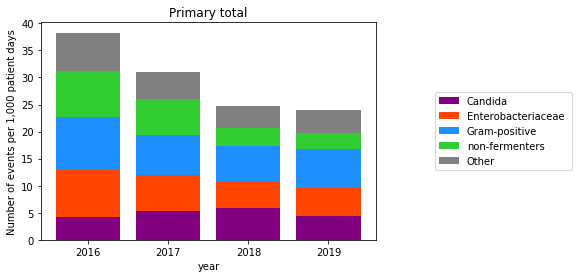

In [176]:
t=bacteria_class_grouped_pd
y1 = t['primary_total_rate'].loc[t['bacteria_class']=='Candida',].values
y2 = t['primary_total_rate'].loc[t['bacteria_class']=='Enterobacteriaceae\xa0',].values
y3 = t['primary_total_rate'].loc[t['bacteria_class']=='Gram-positive',].values
y4 = t['primary_total_rate'].loc[t['bacteria_class']=='non-fermenters',].values
y5 = t['primary_total_rate'].loc[pd.isnull(t['bacteria_class']),].values

x=['2016','2017','2018','2019']

plt.bar(x,y1,color="purple",label='Candida')
plt.bar(x,y2,bottom=y1,color="orangered",label='Enterobacteriaceae\xa0')
plt.bar(x,y3,bottom=y1+y2,color="dodgerblue",label='Gram-positive')
plt.bar(x,y4,bottom=y1+y2+y3,color="limegreen",label='non-fermenters')
plt.bar(x,y5,bottom=y1+y2+y3+y4,color="gray",label='Other')

plt.xlabel('year')
plt.ylabel('Number of events per 1,000 patient days') 
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title('Primary total')
plt.savefig('bacteria_plot_1.png',pad_inches=0.5)

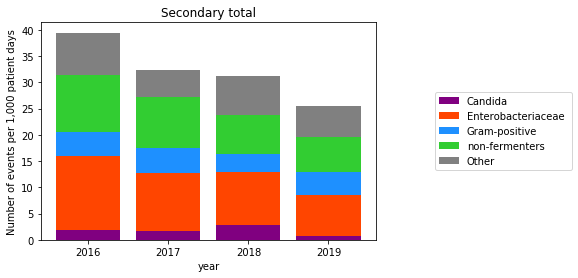

In [177]:
t=bacteria_class_grouped_pd
y1 = t['secondary_BSI_rate'].loc[t['bacteria_class']=='Candida',].values
y2 = t['secondary_BSI_rate'].loc[t['bacteria_class']=='Enterobacteriaceae\xa0',].values
y3 = t['secondary_BSI_rate'].loc[t['bacteria_class']=='Gram-positive',].values
y4 = t['secondary_BSI_rate'].loc[t['bacteria_class']=='non-fermenters',].values
y5 = t['secondary_BSI_rate'].loc[pd.isnull(t['bacteria_class']),].values

x=['2016','2017','2018','2019']

plt.bar(x,y1,color="purple",label='Candida')
plt.bar(x,y2,bottom=y1,color="orangered",label='Enterobacteriaceae\xa0')
plt.bar(x,y3,bottom=y1+y2,color="dodgerblue",label='Gram-positive')
plt.bar(x,y4,bottom=y1+y2+y3,color="limegreen",label='non-fermenters')
plt.bar(x,y5,bottom=y1+y2+y3+y4,color="gray",label='Other')

plt.xlabel('year')
plt.ylabel('Number of events per 1,000 patient days') 
plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))
plt.title('Secondary total')
plt.savefig('bacteria_plot_1.png',pad_inches=0.5)

In [178]:
t['primary_total_rate'].loc[pd.isnull(t['bacteria_class']),].values

array([7.0045957 , 4.92546465, 4.01595173, 4.21964151])

In [179]:
bacteria_class_grouped_pd

,year,bacteria_class,primary_total_num,secondary_BSI_num,patient_days_sum,primary_total_rate,secondary_BSI_rate,period_ind
0,2016,None,41.0,47.0,58533.0,7.004596,8.029658,0
1,2016,Candida,25.0,11.0,58533.0,4.271095,1.879282,0
2,2016,Enterobacteriaceae,51.0,82.0,58533.0,8.713034,14.009191,0
3,2016,Gram-positive,57.0,27.0,58533.0,9.738096,4.612783,0
4,2016,non-fermenters,50.0,64.0,58533.0,8.542190,10.934003,0
5,2017,None,49.0,50.0,99483.0,4.925465,5.025984,0
6,2017,Candida,53.0,17.0,99483.0,5.327543,1.708835,0
7,2017,Enterobacteriaceae,66.0,110.0,99483.0,6.634299,11.057166,0
8,2017,Gram-positive,74.0,47.0,99483.0,7.438457,4.724425,0
9,2017,non-fermenters,66.0,97.0,99483.0,6.634299,9.750410,0


In [180]:
#writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\results_8_7.xlsx', engine='xlsxwriter')
#bacteria_final.to_excel(writer, sheet_name='bacteria')
#writer.save()

#writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\bacteria_class_by_year.xlsx', engine='xlsxwriter')
#bacteria_class_grouped_pd.to_excel(writer, sheet_name='sheet_1')
#writer.save()

In [181]:
q_add_period_ind = """ select *,
                              case when year in (2016,2017) then 0 else 1 end as period_ind
                       from df_2016_long_classified_grouped;"""

df_2016_2019_for_size = pysqldf(q_add_period_ind)     
pd.crosstab(df_2016_2019_for_size['period_ind'],df_2016_2019_for_size['year'])

year,2016,2017,2018,2019,NaN
period_ind,,,,,
0,546,880,0,0,0
1,0,0,886,922,3


In [182]:
# Hosp group analysis

q_hosp_analysis = """select size,
                            period_ind,
                            sum(number_of_CLABSI) as CLABSI_sum,
                            sum(number_of_primary_non_CLABSI) as primary_nonCLABSI_sum,
                            sum(non_CLABSI_number) as non_CLABSI_sum,
                            sum(total_number_of_events) as total_sum,
                            sum(LowerResp) as pneu_sum,
                            sum(IntraAbdominal) as IntraAbdominal_sum,
                            sum(SurgerySite) as SSI_sum,
                            sum(UrinaryTract) as UTI_sum,
                            sum(Other) as other_sum,
                            sum(line_days) as line_days_sum,
                            sum(patient_days) as patient_days_sum,
                            (sum(number_of_CLABSI)/sum(line_days))*1000 as CLABSI_rate,
                            (sum(non_CLABSI_number)/sum(patient_days))*1000 as non_CLABSI_rate,
                            (sum(number_of_primary_non_CLABSI)/sum(patient_days))*1000 as primary_nonCLABSI_rate,
                            (sum(LowerResp)/sum(patient_days))*1000 as pneu_rate,
                            (sum(IntraAbdominal)/sum(patient_days))*1000 as IntraAbdominal_rate,
                            (sum(SurgerySite)/sum(patient_days))*1000 as SSI_rate,
                            (sum(UrinaryTract)/sum(patient_days))*1000 as UTI_rate,
                            (sum(Other)/sum(patient_days))*1000 as other_rate,
                            (sum(total_number_of_events)/sum(patient_days))*1000 as total_rate
                     from df_2016_2019_for_size
                     where hospital not in ('אסותא רמת החיל','הרצליה מדיקל סנטר')   
                     and Ward in ('ICU') 
                     group by size,
                              period_ind;"""
hosp_analysis=pysqldf(q_hosp_analysis)
hosp_analysis

q_hosp_analysis_total = """select period_ind,
                            sum(number_of_CLABSI) as CLABSI_sum,
                            sum(number_of_primary_non_CLABSI) as primary_nonCLABSI_sum,
                            sum(non_CLABSI_number) as non_CLABSI_sum,
                            sum(total_number_of_events) as total_sum,
                            sum(LowerResp) as pneu_sum,
                            sum(IntraAbdominal) as IntraAbdominal_sum,
                            sum(SurgerySite) as SSI_sum,
                            sum(UrinaryTract) as UTI_sum,
                            sum(Other) as other_sum,
                            sum(line_days) as line_days_sum,
                            sum(patient_days) as patient_days_sum,
                            (sum(number_of_CLABSI)/sum(line_days))*1000 as CLABSI_rate,
                            (sum(non_CLABSI_number)/sum(patient_days))*1000 as non_CLABSI_rate,
                            (sum(number_of_primary_non_CLABSI)/sum(patient_days))*1000 as primary_nonCLABSI_rate,
                            (sum(LowerResp)/sum(patient_days))*1000 as pneu_rate,
                            (sum(IntraAbdominal)/sum(patient_days))*1000 as IntraAbdominal_rate,
                            (sum(SurgerySite)/sum(patient_days))*1000 as SSI_rate,
                            (sum(UrinaryTract)/sum(patient_days))*1000 as UTI_rate,
                            (sum(Other)/sum(patient_days))*1000 as other_rate,
                            (sum(total_number_of_events)/sum(patient_days))*1000 as total_rate
                     from df_2016_2019_for_size
                     where hospital not in ('אסותא רמת החיל','הרצליה מדיקל סנטר')   
                     and Ward in ('ICU') 
                     group by period_ind;"""
hosp_analysis_total=pysqldf(q_hosp_analysis_total)
hosp_analysis_total

,period_ind,CLABSI_sum,primary_nonCLABSI_sum,non_CLABSI_sum,total_sum,pneu_sum,IntraAbdominal_sum,SSI_sum,UTI_sum,other_sum,...,patient_days_sum,CLABSI_rate,non_CLABSI_rate,primary_nonCLABSI_rate,pneu_rate,IntraAbdominal_rate,SSI_rate,UTI_rate,other_rate,total_rate
0,0,354.0,134.0,642.0,996.0,261,92,41,48,42,...,155855.0,3.728121,4.119213,0.859774,1.674633,0.590292,0.263065,0.307979,0.269481,6.390555
1,1,256.0,143.0,706.0,970.0,338,112,26,37,38,...,206969.0,2.149021,3.411139,0.690925,1.633095,0.541144,0.125623,0.178771,0.183602,4.686692


In [183]:
df_2016_2019_for_size

,unit_name,unit_type,Ward,hospital,hosp_num,size,month_year,year,month,number_of_CLABSI,...,non_CLABSI_number,line_days,patient_days,SurgerySite,UrinaryTract,IntraAbdominal,LowerResp,NEC,Other,period_ind
0,טיפול נמרץ כירורגי בלבד,None,ICU,איכילוב,11.0,1.0,2018-01-01 00:00:00.000000,2018,1,0.0,...,2.0,131,268,0,0,1,0,0,0,1
1,טיפול נמרץ כירורגי בלבד,None,ICU,איכילוב,11.0,1.0,2018-02-01 00:00:00.000000,2018,2,0.0,...,2.0,113,234,0,0,1,1,0,0,1
2,טיפול נמרץ כירורגי בלבד,None,ICU,איכילוב,11.0,1.0,2018-03-01 00:00:00.000000,2018,3,2.0,...,1.0,127,238,0,0,0,1,0,0,1
3,טיפול נמרץ כירורגי בלבד,None,ICU,איכילוב,11.0,1.0,2018-04-01 00:00:00.000000,2018,4,0.0,...,2.0,144,276,0,0,1,1,0,0,1
4,טיפול נמרץ כירורגי בלבד,None,ICU,איכילוב,11.0,1.0,2018-05-01 00:00:00.000000,2018,5,2.0,...,1.0,207,289,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3232,טיפול נמרץ ראות,None,ICU,וולפסון,4.0,2.0,2019-08-01 00:00:00.000000,2019,8,0.0,...,0.0,30.0,106.0,0,0,0,0,0,0,1
3233,טיפול נמרץ ראות,None,ICU,וולפסון,4.0,2.0,2019-09-01 00:00:00.000000,2019,9,0.0,...,0.0,22.0,113.0,0,0,0,0,0,0,1
3234,טיפול נמרץ ראות,None,ICU,וולפסון,4.0,2.0,2019-10-01 00:00:00.000000,2019,10,1.0,...,0.0,31.0,104.0,0,0,0,0,0,0,1
3235,טיפול נמרץ ראות,None,ICU,וולפסון,4.0,2.0,2019-11-01 00:00:00.000000,2019,11,1.0,...,0.0,37.0,108.0,0,0,0,0,0,0,1


In [184]:
t=hosp_analysis
t['line_days_lag'] = t.sort_values(by=['period_ind'], ascending=True).groupby(['size'])['line_days_sum'].shift(1)
t['patient_days_lag'] = t.sort_values(by=['period_ind'], ascending=True).groupby(['size'])['patient_days_sum'].shift(1)

for name in ['total','CLABSI','non_CLABSI','primary_nonCLABSI','pneu','IntraAbdominal','SSI','UTI','other']:
    t[name+'_'+'lag'] = t.sort_values(by=['period_ind'],ascending='TRUE').groupby(['size'])[name+'_sum'].shift(1)
    if name == 'CLABSI':
        
        t[name+'_sd'] = [math.sqrt(x)/y for (x,y) in zip(t[name+'_sum'],t['line_days_sum'])]
        expected = (t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']/(t['line_days_sum']+t['line_days_lag'])
        std = ((t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']*t['line_days_lag'])/((t['line_days_sum']+t['line_days_lag'])**2) 
        
    else:
        t[name+'_sd'] = [math.sqrt(x)/y for (x,y) in zip(t[name+'_sum'],t['patient_days_sum'])]
        expected = (t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']/(t['line_days_sum']+t['line_days_lag'])
        std = ((t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']*t['line_days_lag'])/((t['line_days_sum']+t['line_days_lag'])**2) 
        
    t[name+'_LL'] = [(x/1000-1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]
    t[name+'_UL'] = [(x/1000+1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]    
    t[name+'_IRD'] = (t[name+'_rate'] - t.sort_values(by=['period_ind'],ascending='TRUE').groupby(['size'])[name+'_rate'].shift(1))  
    t[name+'_'+'chi'] = (t[name+'_'+'sum']-expected)**2/std
    t[name+'_'+'IRD_LL'] = t[name+'_'+'IRD'] - 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_'+'IRD_UL'] = t[name+'_'+'IRD'] + 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_pval'] =  [1- scipy.stats.chi2.cdf(x,1) for x in t[name+'_chi']] 
    #t[name+'_sd_lag'] = t.sort_values(by=['period_ind'],ascending='TRUE').groupby(['size'])[name+'_sd'].shift(1) 
    #t[name+'_IRD_sd'] = [math.sqrt(x**2+y**2) for (x,y) in zip(t[name+'_sd'],t[name+'_sd_lag'])]
    #t[name+'_z'] = [(x/1000)/y for (x,y) in zip(t[name+'_IRD'],t[name+'_IRD_sd'])]
    #t[name+'_pval'] = [scipy.stats.norm.sf(abs(x))*2 for x in t[name+'_z']]    
    
    t.drop(['line_days_lag','patient_days_lag',name+'_'+'lag'],1)
t 


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1807: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= _b) & cond0


,size,period_ind,CLABSI_sum,primary_nonCLABSI_sum,non_CLABSI_sum,total_sum,pneu_sum,IntraAbdominal_sum,SSI_sum,UTI_sum,...,UTI_pval,other_lag,other_sd,other_LL,other_UL,other_IRD,other_chi,other_IRD_LL,other_IRD_UL,other_pval
0,NaN,0,5.0,2.0,15.0,20.0,8,2,1,2,...,NaN,NaN,0.000226,-0.216704,0.668172,NaN,NaN,NaN,NaN,NaN
1,NaN,1,0.0,1.0,1.0,1.0,0,0,0,0,...,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
2,1.0,0,128.0,62.0,323.0,451.0,126,49,27,18,...,NaN,NaN,0.000081,0.277704,0.595527,NaN,NaN,NaN,NaN,NaN
3,1.0,1,105.0,61.0,382.0,487.0,185,66,14,19,...,0.621712,29.0,0.000064,0.207006,0.457756,-0.104234,1.164878,-0.293523,0.085055,0.280456
4,2.0,0,150.0,51.0,232.0,382.0,99,31,10,23,...,NaN,NaN,0.000055,0.074665,0.290413,NaN,NaN,NaN,NaN,NaN
5,2.0,1,100.0,50.0,231.0,337.0,118,30,8,14,...,0.022707,11.0,0.000034,0.029259,0.161331,-0.087244,1.581384,-0.223225,0.048736,0.208561
6,3.0,0,71.0,19.0,72.0,143.0,28,10,3,5,...,NaN,NaN,0.000040,-0.038797,0.119625,NaN,NaN,NaN,NaN,NaN
7,3.0,1,51.0,31.0,92.0,145.0,35,16,4,4,...,0.366984,1.0,0.000043,-0.009724,0.157504,0.033476,0.412335,-0.068704,0.135656,0.520787


In [185]:
t=hosp_analysis_total
t['line_days_lag'] = t.sort_values(by=['period_ind'], ascending=True)['line_days_sum'].shift(1)
t['patient_days_lag'] = t.sort_values(by=['period_ind'], ascending=True)['patient_days_sum'].shift(1)

for name in ['total','CLABSI','non_CLABSI','primary_nonCLABSI','pneu','IntraAbdominal','SSI','UTI','other']:
    t[name+'_'+'lag'] = t.sort_values(by=['period_ind'],ascending='TRUE')[name+'_sum'].shift(1)
    if name == 'CLABSI':
        t[name+'_sd'] = [math.sqrt(x)/y for (x,y) in zip(t[name+'_sum'],t['line_days_sum'])]
        expected = (t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']/(t['line_days_sum']+t['line_days_lag'])
        std = ((t[name+'_'+'sum']+t[name+'_'+'lag'])*t['line_days_sum']*t['line_days_lag'])/((t['line_days_sum']+t['line_days_lag'])**2) 
        
    else:
        t[name+'_sd'] = [math.sqrt(x)/y for (x,y) in zip(t[name+'_sum'],t['patient_days_sum'])]
        expected = (t[name+'_'+'sum']+t[name+'_'+'lag'])*t['patient_days_sum']/(t['patient_days_sum']+t['patient_days_lag'])
        std = ((t[name+'_'+'sum']+t[name+'_'+'lag'])*t['patient_days_sum']*t['patient_days_lag'])/((t['patient_days_sum']+t['patient_days_lag'])**2) 
        
    t[name+'_LL'] = [(x/1000-1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]
    t[name+'_UL'] = [(x/1000+1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]       
    t[name+'_IRD'] = (t[name+'_rate'] - t.sort_values(by=['period_ind'],ascending='TRUE')[name+'_rate'].shift(1))   
    t[name+'_'+'chi'] = (t[name+'_'+'sum']-expected)**2/std
    t[name+'_'+'IRD_LL'] = t[name+'_'+'IRD'] - 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_'+'IRD_UL'] = t[name+'_'+'IRD'] + 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_pval'] =  [1- scipy.stats.chi2.cdf(x,1) for x in t[name+'_chi']] 
    #t[name+'_sd_lag'] = t.sort_values(by=['period_ind'],ascending='TRUE')[name+'_sd'].shift(1) 
    #t[name+'_IRD_sd'] = [math.sqrt(x**2+y**2) for (x,y) in zip(t[name+'_sd'],t[name+'_sd_lag'])]
    #t[name+'_z'] = [(x/1000)/y for (x,y) in zip(t[name+'_IRD'],t[name+'_IRD_sd'])]
    #t[name+'_pval'] = [scipy.stats.norm.sf(abs(x))*2 for x in t[name+'_z']] 
    
    
    

    
    t.drop(['line_days_lag','patient_days_lag',name+'_'+'lag'],1)
    

In [186]:
t=bacteria_class_period
t['primary_total_num_rate'] = [(x/y)*1000 for (x,y) in zip(t['primary_total_num'],t['patient_days_sum'])]
t['secondary_BSI_num_rate'] = [(x/y)*1000 for (x,y) in zip(t['secondary_BSI_num'],t['patient_days_sum'])]
t['primary_total_num_lag'] = t.sort_values(by=['period_ind'], ascending=True).groupby(['bacteria_class_2'])['primary_total_num'].shift(1)
t['secondary_BSI_num_lag'] = t.sort_values(by=['period_ind'], ascending=True).groupby(['bacteria_class_2'])['secondary_BSI_num'].shift(1)
t['patient_days_lag'] = t.sort_values(by=['period_ind'], ascending=True).groupby(['bacteria_class_2'])['patient_days_sum'].shift(1)

for name in ['primary_total_num','secondary_BSI_num']:
    t[name+'_sd'] = [math.sqrt(x)/y for (x,y) in zip(t[name],t['patient_days_sum'])]
    expected = (t[name]+t[name+'_'+'lag'])*t['patient_days_sum']/(t['patient_days_sum']+t['patient_days_lag'])
    std = ((t[name]+t[name+'_'+'lag'])*t['patient_days_sum']*t['patient_days_lag'])/((t['patient_days_sum']+t['patient_days_lag'])**2) 

    t[name+'_LL'] = [(x/1000-1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]
    t[name+'_UL'] = [(x/1000+1.96*y)*1000 for (x,y) in zip(t[name+'_rate'],t[name+'_sd'])]    
    t[name+'_IRD'] = (t[name+'_rate'] - t.sort_values(by=['period_ind'],ascending='TRUE').groupby(['bacteria_class_2'])[name+'_rate'].shift(1))  
    t[name+'_'+'chi'] = (t[name]-expected)**2/std
    t[name+'_'+'IRD_LL'] = t[name+'_'+'IRD'] - 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_'+'IRD_UL'] = t[name+'_'+'IRD'] + 1.96*(t[name+'_'+'IRD']**2/t[name+'_'+'chi'])**0.5
    t[name+'_pval'] =  [1- scipy.stats.chi2.cdf(x,1) for x in t[name+'_chi']]  

t.iloc[0:20,]

,period_ind,bacteria_class,primary_total_num,secondary_BSI_num,patient_days_sum,bacteria_class_2,primary_total_num_rate,secondary_BSI_num_rate,primary_total_num_lag,secondary_BSI_num_lag,...,primary_total_num_IRD_UL,primary_total_num_pval,secondary_BSI_num_sd,secondary_BSI_num_LL,secondary_BSI_num_UL,secondary_BSI_num_IRD,secondary_BSI_num_chi,secondary_BSI_num_IRD_LL,secondary_BSI_num_IRD_UL,secondary_BSI_num_pval
0,0,None,90.0,97.0,158016.0,other,0.569563,0.613862,NaN,NaN,...,NaN,NaN,0.000062,0.491699,0.736025,NaN,NaN,NaN,NaN,NaN
1,0,Candida,78.0,28.0,158016.0,Candida,0.493621,0.177197,NaN,NaN,...,NaN,NaN,0.000033,0.111562,0.242832,NaN,NaN,NaN,NaN,NaN
2,0,Enterobacteriaceae,117.0,192.0,158016.0,Enterobacteriaceae,0.740431,1.215067,NaN,NaN,...,NaN,NaN,0.000088,1.043195,1.386939,NaN,NaN,NaN,NaN,NaN
3,0,Gram-positive,131.0,74.0,158016.0,Gram-positive,0.829030,0.468307,NaN,NaN,...,NaN,NaN,0.000054,0.361605,0.575009,NaN,NaN,NaN,NaN,NaN
4,0,non-fermenters,116.0,161.0,158016.0,non-fermenters,0.734103,1.018884,NaN,NaN,...,NaN,NaN,0.000080,0.861497,1.176271,NaN,NaN,NaN,NaN,NaN
5,1,None,89.0,145.0,216087.0,other,0.411871,0.671026,90.0,97.0,...,-0.015780,2.941031e-02,0.000056,0.561804,0.780248,0.057164,0.461064,-0.107842,0.222170,0.497127
6,1,Candida,109.0,38.0,216087.0,Candida,0.504426,0.175855,78.0,28.0,...,0.155854,8.839112e-01,0.000029,0.119941,0.231769,-0.001342,0.000932,-0.087514,0.084829,0.975646
7,1,Enterobacteriaceae,111.0,194.0,216087.0,Enterobacteriaceae,0.513682,0.897787,117.0,192.0,...,-0.066588,5.522285e-03,0.000064,0.771450,1.024123,-0.317280,8.904891,-0.525674,-0.108886,0.002844
8,1,Gram-positive,149.0,84.0,216087.0,Gram-positive,0.689537,0.388732,131.0,74.0,...,0.037996,1.234591e-01,0.000042,0.305601,0.471864,-0.079575,1.368430,-0.212902,0.053753,0.242082
9,1,non-fermenters,69.0,151.0,216087.0,non-fermenters,0.319316,0.698793,116.0,161.0,...,-0.270517,1.749233e-08,0.000057,0.587333,0.810252,-0.320092,11.213044,-0.507448,-0.132735,0.000812


In [187]:
writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\results_24_5_22.xlsx', engine='xlsxwriter')
table_4_Ward_IRD.to_excel(writer, sheet_name='ward+IRD')
#table_4_size.to_excel(writer, sheet_name='HospGroup')
#secondary_by_year.to_excel(writer, sheet_name='secondary')
bacteria_group_grouped_pd.to_excel(writer, sheet_name='bacteria')
bacteria_class_grouped_pd.to_excel(writer, sheet_name='bacteria_group')
    #worksheet_1 = writer.sheets['bacteria']
    #worksheet_1.insert_image('E3','bacteria_plot_1.png')
hosp_analysis.to_excel(writer,sheet_name='Intervention_by_hosp')
hosp_analysis_total.to_excel(writer,sheet_name='Intervention_total')
bacteria_class_period.to_excel(writer,sheet_name='bacteria_by_period')

writer.save()

In [188]:
#writer = pd.ExcelWriter(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\hosp_group_analysis_period.xlsx', engine='xlsxwriter')
#hosp_analysis.to_excel(r'P:\NationalEpidemiology\Personal_folders\debby\BSI_in_ICU_2021\hosp_group_analysis_period.xlsx', sheet_name='sheet1')

In [189]:
#df_2016_long_classified_grouped['hospital'].unique()
#df_2016_long_classified_grouped[['hospital','Ward','unit_name','unit_type']].head()
#df_2016_long_classified_grouped['unit_type'].unique()
#t=df_2016_long_classified_grouped
#t['size'].loc[(t['hosp_num']==2) & (t['Ward'] != 'ICUP') & (t['Ward'] != 'PAG') ].unique()
#t[['size','hospital']].head()
#pd.crosstab(t.size,t.hospital)
hospital_group
#df_2016_long_classified_grouped['hospital'].unique()

,size,hosp_num,hosp_name,num_beds_licensed,num_beds_general
0,1,1,שיבא,1532,1102
1,1,11,איכילוב,1138,1048
2,1,14,סורוקה,1063,1035
3,1,3,"רמב""ם",962,922
4,1,13,בילינסון,800,809
5,1,24,הדסה עין כרם,706,667
6,2,26,שערי צדק,849,839
7,2,5,"יצחק שמיר (אסה""ר)",848,768
8,2,15,מאיר,742,690
9,2,4,וולפסון,672,672


In [99]:
scipy.stats.norm.sf(abs(0.304))*2

0.7611278911568145